### QUESTION: 
What about clinical data? Maybe not important in radiogenomics associations, but maybe it is?
<br> For t-SNE distance algorithm:
<br> there are some genes in the gene list that I cannot match
<br> Paul: Why is the threshold 4? for the sum of genes. 

# Download, show stats, and save TCIA / TCGA data 

In [74]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import numpy as np

# Validation
from sklearn.model_selection import train_test_split

# t-SNE
from sklearn.manifold import TSNE

# Append system path to look for additional modules (needed for rcca)
import sys
sys.path.append("/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Packages/")
sys.path.append("/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/kim_code/")

# Import self-build script
import radiogenomics as r

# Import rcca module/script
import rcca

#Plotly 
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

# NEW TCIA DATA (BRaTS)
### Todo: There are two subjects with same ID (look in Excel)
... you can also get clinical data now!

In [75]:
df_BRATS_TCIA = r.download_data('BRATS_TCIA_MATCHES')
df_BRATS_TCIA.shape

(74, 1)

In [76]:
r.save(df_BRATS_TCIA, "TCIA_BRATS_MATCHES")

### Make descriptive stats

In [77]:
list_bakas  = []
for i in range(393):
    list_bakas.append("TCGA")
for i in range(102):
    list_bakas.append("TCIA")
for i in range(57):
    list_bakas.append("Matches")
df_bakas = pd.DataFrame(data=list_bakas, columns=['Matches for pre-supplied TCIA features'])

list_own = []
for i in range(393):
    list_own.append("TCGA")
for i in range(74):
    list_own.append("TCIA")
for i in range(35):
    list_own.append("Matches")
df_own = pd.DataFrame(data=list_bakas, columns=['Matches where feature extraction is possible'])

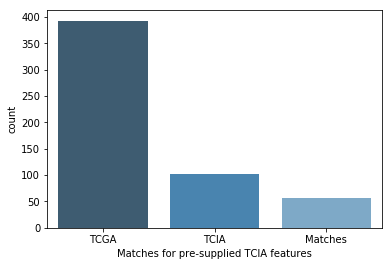

In [78]:
sns.countplot(x='Matches for pre-supplied TCIA features', 
              data=df_bakas, 
              palette="Blues_d")

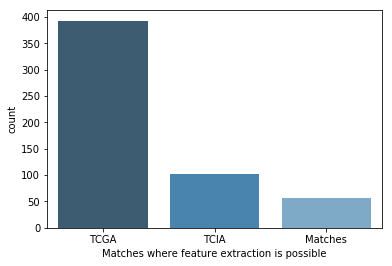

In [79]:
sns.countplot(x='Matches where feature extraction is possible', 
              data=df_own, 
              palette="Blues_d")

### Clinical Data

In [80]:
df_clinical = pd.read_excel('/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Input_Data/clinical_data.xlsx')
df_clinical = df_clinical.set_index('TCIA', drop=True)
print(df_clinical.shape)


# Bakas data
df_TCIA = r.download_data("TCIA")
df_TCIA = r.make_clean_df("TCIA", df_TCIA)
print(df_TCIA.shape)

# TCIA own features

(260, 2)
(102, 704)


In [81]:
# Check matches - Bakas data 101 with clinical data, 53 out of the 57
i = 0
for j in df.index:
    if j in df_TCIA.index:
        i +=1
print(i)

101


In [91]:
# Get Clinical
print(df_clinical.shape)

# Get 74 matches
print(df_BRATS_TCIA.shape)

# Get 35 matches
df_35 = pd.read_csv('/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Output_Data/Bakas57subjects/TCIA_BRATS_TCGA_MATCHES')
df_35 = df_35.set_index('TCGA', drop=True)
print(df_35.shape)
df_35

c = 0 
for i in list(df_35.index):
    if i in list(df_clinical.index):
        c +=1
print(c)


# Get 57 subjects from TCIA (Bakas)
tcia_57 = pd.read_csv('/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Output_Data/Bakas57subjects/9genes_11img/TCIA_(57,9)')
tcia_57 = tcia_57.set_index('ID', drop=True)

c2 = 0
for i in list(df_35.index):
    if i in list(tcia_57.index):
        c2 +=1
print(c2)
tcia_57.shape

(260, 2)
(74, 1)
(35, 1)
35
34


(57, 11)

In [68]:
# Check matches - Own data
i = 0
for j in df.index:
    if j in df_TCIA.index:
        i +=1
print(i)

101


### TCGA data
(393,17107)

In [93]:
df_TCGA = r.download_data("TCGA")
df_TCGA.shape

(17107, 394)

In [97]:
# Download and clean set up dataFrame:
df_TCGA = r.download_data("TCGA")
df_TCGA = r.make_clean_df("TCGA", df_TCGA)
df_TCGA.shape
display(df_TCGA.iloc[4:,:])

Mutations    POSTN LUZP2 KLHDC1 EPC1 UBXN2A SAP30 RSU1P2 ZSCAN20 MTX1 FANCB  \
ID                                                                            
TCGA-02-2466     0     0      0    0      0     0      0       0    0     0   
TCGA-02-2470     0     0      0    0      0     0      0       0    0     0   
TCGA-02-2483     0     0      0    0      0     0      0       0    0     0   
TCGA-02-2485     0     0      0    0      0     0      0       0    0     0   
TCGA-02-2486     0     0      0    0      0     0      0       0    1     0   
TCGA-06-0119     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0122     0     0      0    0      0     0      0       1    0     0   
TCGA-06-0124     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0125     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0126     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0128     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0129     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0130     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0132     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0137     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0139     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0140     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0141     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0142     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0145     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0151     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0152     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0154     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0155     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0157     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0158     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0165     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0166     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0167     0     0      0    0      0     0      0       0    0     0   
TCGA-06-0168     0     0      0    0      0     0      0       0    0     0   
...            ...   ...    ...  ...    ...   ...    ...     ...  ...   ...   
TCGA-76-4926     0     0      0    0      0     0      0       0    0     0   
TCGA-76-4927     0     0      0    0      0     0      1       0    0     0   
TCGA-76-4928     0     1      0    0      0     0      0       0    0     0   
TCGA-76-4929     0     0      0    0      0     0      0       0    0     0   
TCGA-76-4931     0     0      0    0      0     0      0       0    0     0   
TCGA-76-4932     0     0      0    0      0     0      0       0    0     0   
TCGA-76-4934     0     0      0    0      0     0      0       0    0     0   
TCGA-76-4935     0     0      0    0      0     0      0       0    0     0   
TCGA-76-6191     0     0      0    0      0     0      0       0    0     0   
TCGA-76-6192     0     0      0    0      0     0      0       0    0     0   
TCGA-76-6193     0     0      0    0      0     0      0       0    0     0   
TCGA-76-6280     0     0      0    0      0     0      0       0    0     0   
TCGA-76-6282     0     0      0    0      0     0      0       0    0     0   
TCGA-76-6283     0     0      0    0      0     0      0       0    0     0   
TCGA-76-6285     0     0      0    0      0     0      0       0    0     0   
TCGA-76-6286     0     0      0    0      0     0      0       0    0     0   
TCGA-76-6656     0     0      0    0      0     0      0       0    0     0   
TCGA-76-6657     0     0      0    0      0     0 

### TCIA Data (Bakas et. al)

(102,704)

In [99]:
# Download and clean set up dataFrame:
df_TCIA = r.download_data("TCIA")
df_TCIA = r.make_clean_df("TCIA", df_TCIA)
df_TCIA.shape
display(df_TCIA.iloc[4:,:])

Features      VOLUME_ET  VOLUME_NET  VOLUME_ED  VOLUME_TC  VOLUME_WT  \
ID                                                                     
TCGA-02-0033      34538        7137      65653      41675     107328   
TCGA-02-0034      45111       25394      84003      70505     154508   
TCGA-02-0037      43375       13188      68807      56563     125370   
TCGA-02-0046      35721        4212     103826      39933     143759   
TCGA-02-0047      50410       11908     160681      62318     222999   
TCGA-02-0054      17276        8969      54524      26245      80769   
TCGA-02-0059      74539       27014      61825     101553     163378   
TCGA-02-0064      26241        9905      19635      36146      55781   
TCGA-02-0068      13224       11978      74657      25202      99859   
TCGA-02-0069      16944       53232      76326      70176     146502   
TCGA-02-0070       8994        3169      25665      12163      37828   
TCGA-02-0075      13892       26109      94553      40001     134554   
TCGA-02-0085      25236        3277      66878      28513      95391   
TCGA-02-0086      79084       16013      91667      95097     186764   
TCGA-02-0087       3852       42877      59124      46729     105853   
TCGA-02-0102       1037         204      11711       1241      12952   
TCGA-02-0106      46904       12627      33130      59531      92661   
TCGA-02-0116      35019        1665      30118      36684      66802   
TCGA-06-0119      64595       15826      83133      80421     163554   
TCGA-06-0122      17941         736      48147      18677      66824   
TCGA-06-0130       9138        2149      30952      11287      42239   
TCGA-06-0137      49748        7195     129318      56943     186261   
TCGA-06-0138      26938       15565      80426      42503     122929   
TCGA-06-0139      31255       18787      38607      50042      88649   
TCGA-06-0142      50084        8759      70998      58843     129841   
TCGA-06-0145      39514       17111      34935      56625      91560   
TCGA-06-0149       6929        1719      59056       8648      67704   
TCGA-06-0154      22125        6401      68609      28526      97135   
TCGA-06-0158       9769         326      35186      10095      45281   
TCGA-06-0162      87754       15960      47101     103714     150815   
...                 ...         ...        ...        ...        ...   
TCGA-12-1098      15090         574      75076      15664      90740   
TCGA-12-1598      40450        4556      87165      45006     132171   
TCGA-12-1601       9525        7338      74917      16863      91780   
TCGA-12-3650       2642          60      14046       2702      16748   
TCGA-14-1456      11994       97830      47925     109824     157749   
TCGA-14-1794      65093       52012      83517     117105     200622   
TCGA-14-1825      47295       10330     112410      57625     170035   
TCGA-14-3477      16998        9487     135912      26485     162397   
TCGA-19-0963      39005       76834      60217     115839     176056   
TCGA-19-1789       7337       10590      57158      17927      75085   
TCGA-19-2624       5899       31614     131242      37513     168755   
TCGA-19-2631      48062       23065     156055      71127     227182   
TCGA-19-5951      27478        8770      18711      36248      54959   
TCGA-19-5954      14528        5987     133610      20515     154125   
TCGA-19-5958      26977       35637      87050      62614     149664   
TCGA-19-5960      69222        8116      79659      77338     156997   
TCGA-76-4932      26417       23302      21432      49719      71151   
TCGA-76-4934      52126       32332      53697      84458     138155   
TCGA-76-4935      36375       29583      21267      65958      87225   
TCGA-76-6191      20160        1590      37067      21750      58817   
TCGA-76-6193       3271          47      70583       3318      73901   
TCGA-76-6280      17626        3274      62021      20900      82921   
TCGA-76-6282      44540       28928     

### Selected genes list
(281,1), i.e. 281 genes in list

In [7]:
# Download data
df_selected_genes = r.download_data("GENES")
#df_selected_genes

### Gene groups

In [8]:
#df_gene_groups = r.download_data("GENE_GROUPS")
dict_gene_groups = r.get_gene_groups()
print(len(dict_gene_groups))
#display(dict_gene_groups['1'])

#print(list(df_selected_genes['Selected Genes']))
# TO BE DELETED, BUT CHECKS FOR MATCHES IN NAMING
count = 0
pos = 0
for key, vector in dict_gene_groups.items():
    for i in vector:
        #print("i is", i)
        if i not in list(df_selected_genes['Selected Genes']):
            count += 1
        if i in list(df_selected_genes['Selected Genes']):
            pos += 1

print(pos)

23
248


### Survival data
(393,7668), then (393,7671) w/ survival columns

In [9]:
# GENE DATA; BUT JUST RELEVANT GENES
# Threshold = how many times that gene has mutated across all 393 subjects
threshold = 3     # Why did paul pick this?
df_gene_data = r.create_gene_data_for_survival_rf(threshold)

In [10]:
# SURVIVAL DATA
df_survival = r.create_survival_columns()
print(df_gene_data.shape)

# Merge for complete data (only keeping subjects that are also in TCGA)
df_gene_data = df_gene_data.join(df_survival)
print(df_gene_data.shape)
# Save
r.save(df_gene_data, "relevant_genes_for_rf")

(393, 7668)
(393, 7671)


In [11]:
print(len(df_gene_data.days_to_last_follow_up))

393


In [12]:
import math
c = 0
no_NaN = []

for i in list(df_gene_data.days_to_last_follow_up):
    if not math.isnan(i):
       no_NaN.append(c)
    c +=1


In [13]:
df_gene_data = df_gene_data.iloc[no_NaN,:]

In [14]:
print(df_gene_data.shape)

(363, 7671)


In [15]:
df_gene_data['Status'] = [int(i) for i in list(df_gene_data['Status'])]
print(sum(df_gene_data['Status']))

273


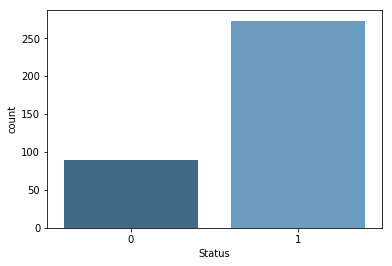

In [16]:
# Plot
my_cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.countplot(x='Status', 
              data=df_gene_data, 
              palette="Blues_d")

### Matches Survival, TCIA, TCGA (without NaN)
= 53 subjects

In [46]:
df = r.surv_TCIA_TCGA_matches()

(53, 2)

### New Matches

In [53]:
df_BRATS_TCIA
df_TCGA

c = 0
c2=0
for subject in df_BRATS_TCIA.index:
    if subject in list(df_TCGA.index):
        c += 1
    if subject in list(df_TCIA.index):
        c2 +=1
        
print("matches with TCGA:", c)
print("matches with old TCIA:",c2)
print(len(df_BRATS_TCIA.index))

matches with TCGA: 35
matches with old TCIA: 73
74


In [55]:
## Save just the 35 matches

for subject in df_BRATS_TCIA.index:
    if subject not in list(df_TCGA.index):
        df_BRATS_TCIA = df_BRATS_TCIA.drop(subject)

df_BRATS_TCIA.shape
r.save(df_BRATS_TCIA, "TCIA_BRATS_TCGA_MATCHES")

In [72]:
c = 0
for i in list(df_BRATS_TCIA.index):
    if i in list(df.index):
        c += 1
c

74

# Descriptive Statistics

### Compare number of samples/subject for imaging vs. genomics

In [ ]:
# Make list with subjects to build Countplot
df_count = r.get_countplot_data("TCIA-TCGA", 
                              df_TCIA=df_TCIA, 
                              df_TCGA=df_TCGA)
# Plot
sns.countplot(x='Source', 
              data=df_count, 
              palette='coolwarm')

### Matches / overlap
57

In [ ]:
# List of matches / overlap 
matches = r.find_matches(df_TCIA, df_TCGA)

### Investigate 57 matches (still descriptive)
- GBM: Primary vs. Secondary
- Gender
- Age

In [ ]:
# Create dataframe with only the matches
df_TCGA_only_matches = pd.DataFrame(data=df_TCGA, index = matches)
df_TCIA_only_matches = pd.DataFrame(data=df_TCIA, index = matches) 
                                    
# Set Column and index names (make pretty)
df_TCGA_only_matches.index.names = ['ID']         # Set index
df_TCGA_only_matches.columns.names = ['Mutations']# Column name                                    
df_TCIA_only_matches.index.names = ['ID']         # Set index
df_TCIA_only_matches.columns.names = ['Features'] # Column name                                 

# Dataframe with only matches and selected genes
df_TCGA_only_matches_selected_genes = r.select_genes(df_TCGA_only_matches, df_selected_genes)

# Shape
print(df_TCGA_only_matches.shape)
print(df_TCIA_only_matches.shape)
print(df_TCGA_only_matches_selected_genes.shape)

In [ ]:
# Get Primary vs. Secondary GBM based on 'IDH1' gene; get dataFrame w/ prim/secondary labels
df_type = r.get_countplot_data('GBM_TYPE', df_TCGA=df_TCGA)

######## PLOTTING ###########
my_plot = sns.countplot(x='GBM Type',
                        data=df_type,
                        palette='coolwarm')

# Control sizing
my_plot.set_xlabel("GBM type",fontsize=20)
my_plot.set_ylabel("Count",fontsize=20)
my_plot.tick_params(labelsize=15)

# Save Cleaned Data

In [ ]:
r.save(df_TCIA_only_matches, "TCIA_clean")
r.save(df_TCGA_only_matches_selected_genes, "TCGA_clean")

# rCCA

### Investigate dimensions of data to find how many canonical components we want 

In [ ]:
print(df_TCGA_only_matches.shape)
print(df_TCIA_only_matches.shape)

Since imaging data is 704 dimensions, we can find 704 canonical components.
<br>
However, this would be super slow because of computational requirements (704 components, checking one feature-vector of 17k). So let's start by reducing data via PCA

### Dimensionality reduction with PCA
This allows for speedier CCA computation

In [ ]:
# Imaging 
# pca reduced dimensions as X-block
pca_imaging = r.run_pca(X_std, matches=matches, dimensions=50)


# Genomic 
#  Mutation  sta-tus  of  the  9  relevant  genes  in  glioblastom ?? Not mentioned in report elsewhere..
# (TP53,  PTEN,  NF1,  EGFR,  IDH1,  PIK3R1,  RB1,  PIK3CA, and  PDGFRA) as Y-block
# Source: Somatic mutations associated with MRI-derived volumetric features in glioblastoma (gutman)
df_relevant_genes = df_TCGA_only_matches[['TP53', 
                                          'PTEN', 
                                          'NF1',
                                          'EGFR',
                                          'IDH1',
                                          'PIK3R1',
                                          'RB1',
                                          'PIK3CA',
                                          'PDGFRA']].copy()
df_relevant_genes = df_relevant_genes.values


### NB: It seems you can only have ONE regularization parameter! Try different things, otherwise mention this as a limitation

In [ ]:
TCGA = pd.read_csv("/Users/kimrants/Desktop/thesis_other/Data_for_R/TCGA")
TCIA_reduced = pd.read_csv("/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Output_Data/Bakas57subjects/PCs38")

In [ ]:
TCGA.set_index('ID',inplace=True,drop=True)
TCIA_reduced.set_index('ID',inplace=True,drop=True)

In [ ]:
# Get minimum dimensions
nCanComponents = min(TCGA.shape[1],
                    TCIA_reduced.shape[1])

# Split into training and validation data
TCIA_train, TCIA_test = train_test_split(TCIA_reduced, test_size=0.2)
TCGA_train, TCGA_test = train_test_split(TCGA, test_size=0.2)

print(TCGA_train.shape)


#print(TCIA_train.shape)
#print(TCGA_train.shape)
#display(TCIA_train)
#display(TCGA_train)

# Create a cca object as an instantiation of the CCA object class. 
cca = rcca.CCA(kernelcca = False, reg = 0.5,
              verbose= True,
              numCC = nCanComponents)


# Train
cca.train([TCIA_train, TCGA_train])

# Test scores
testcorrs = cca.validate([TCIA_test, TCGA_test])

In [ ]:
# Initialize a cca object as an instantiation of the CCACrossValidate class.
ccaCV = rcca.CCACrossValidate(kernelcca=False, numCCs = [1, 2, 3, 4], regs = [0.5, 0.1, 1e2, 1e4])

# Use the train() and validate() methods to run the analysis and perform cross-dataset prediction.
#display(TCGA_train)
TCGA_train.index=[i for i in range(0,45)]
display(TCGA_train)
#ccaCV.train([TCIA_train, TCGA_train], False)
#testcorrsCV = ccaCV.validate([TCIA_test, TCGA_test])

In [ ]:
print('Optimal number of components: %d\nOptimal regularization coefficient: %d' % (ccaCV.best_numCC, ccaCV.best_reg))

In [ ]:
# Plot canonical correlations (cca.cancorrs)
plt.plot(np.arange(ccaCV.best_numCC)+1, ccaCV.cancorrs, 'ko')
plt.xlim(0.5, 0.5+ccaCV.best_numCC)
plt.xticks(np.arange(ccaCV.best_numCC)+1)
plt.ylim(0,1)
plt.xlabel('Canonical component')
plt.ylabel('Canonical correlation')
plt.title('Canonical correlations')
print '''The canonical correlations are:\n
Component 1: %.02f\n
Component 2: %.02f\n
''' % tuple(ccaCV.cancorrs)

### rCCA in R
1) Store TCIA and TCGA (with selected genes) in csv. 
<br>
2) Load into R, perform computations and save new file with results
<br>
3) Load results in Python and display

In [ ]:
# Store TCIA and TCGA (with selected genes) in csv
path = '/Users/kimrants/Desktop/Data_for_R/'

df_TCIA_only_matches.to_csv(path+"TCIA")
df_TCGA_only_matches_selected_genes.to_csv(path+"TCGA")